In [9]:
from probability import *
from information import *

In [10]:
%reload_ext autoreload

%autoreload 2

In [11]:
net = CNN()
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    transform=ToTensor()
)

mnist_train = torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1)

mnist_test = torch.utils.data.DataLoader(test_data,
                                         batch_size=100,
                                         shuffle=True,
                                         num_workers=1)

total_step = len(mnist_train)


In [12]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)    

In [13]:
net.train()
num_epochs = 10
information = Information(net, mnist_train)
information.get_X_Y()
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(mnist_train):
        output = net(images)[0]
        loss = loss_func(output, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
            torch.save(net.state_dict(), f"epoch_{epoch}.pth")
    information.get_data(net)
    information.get_pdf(if_comp=False)
    information.get_mi()
    information.save_inf_dict(epoch,'json_not_comp')


Epoch [1/10], Step [100/600], Loss: 0.1418
Epoch [1/10], Step [200/600], Loss: 0.0934
Epoch [1/10], Step [300/600], Loss: 0.0154
Epoch [1/10], Step [400/600], Loss: 0.0768
Epoch [1/10], Step [500/600], Loss: 0.0054
Epoch [1/10], Step [600/600], Loss: 0.0196
Epoch [2/10], Step [100/600], Loss: 0.0667
Epoch [2/10], Step [200/600], Loss: 0.0247
Epoch [2/10], Step [300/600], Loss: 0.0230
Epoch [2/10], Step [400/600], Loss: 0.0542
Epoch [2/10], Step [500/600], Loss: 0.0204
Epoch [2/10], Step [600/600], Loss: 0.0160
Epoch [3/10], Step [100/600], Loss: 0.0502
Epoch [3/10], Step [200/600], Loss: 0.0038
Epoch [3/10], Step [300/600], Loss: 0.0538
Epoch [3/10], Step [400/600], Loss: 0.0270
Epoch [3/10], Step [500/600], Loss: 0.1426
Epoch [3/10], Step [600/600], Loss: 0.0607
Epoch [4/10], Step [100/600], Loss: 0.0826
Epoch [4/10], Step [200/600], Loss: 0.0285
Epoch [4/10], Step [300/600], Loss: 0.0382
Epoch [4/10], Step [400/600], Loss: 0.0091
Epoch [4/10], Step [500/600], Loss: 0.0408
Epoch [4/10

In [14]:
import json

mi_xz1 = []
mi_yz1 = []
mi_xz2 = []
mi_yz2 = []
mi_xz3 = []
mi_yz3 = []
mi_z1 = []
mi_z2 = []
mi_z3 = []

for i in range(10):
    str_i = str(i)
    json_file_path = f'data/json_not_comp/{str_i}.json'
    f = open(json_file_path)
    data = json.load(f)
    mi_xz1.append(data['mi_xz1'])
    mi_yz1.append(data['mi_yz1'])
    mi_xz2.append(data['mi_xz2'])
    mi_yz2.append(data['mi_yz2'])
    mi_xz3.append(data['mi_xz3'])
    mi_yz3.append(data['mi_yz3'])
    mi_z1.append(data['h_z1'])
    mi_z2.append(data['h_z2'])
    mi_z3.append(data['h_z3'])

Text(0.5, 1.0, 'H[Z3]')

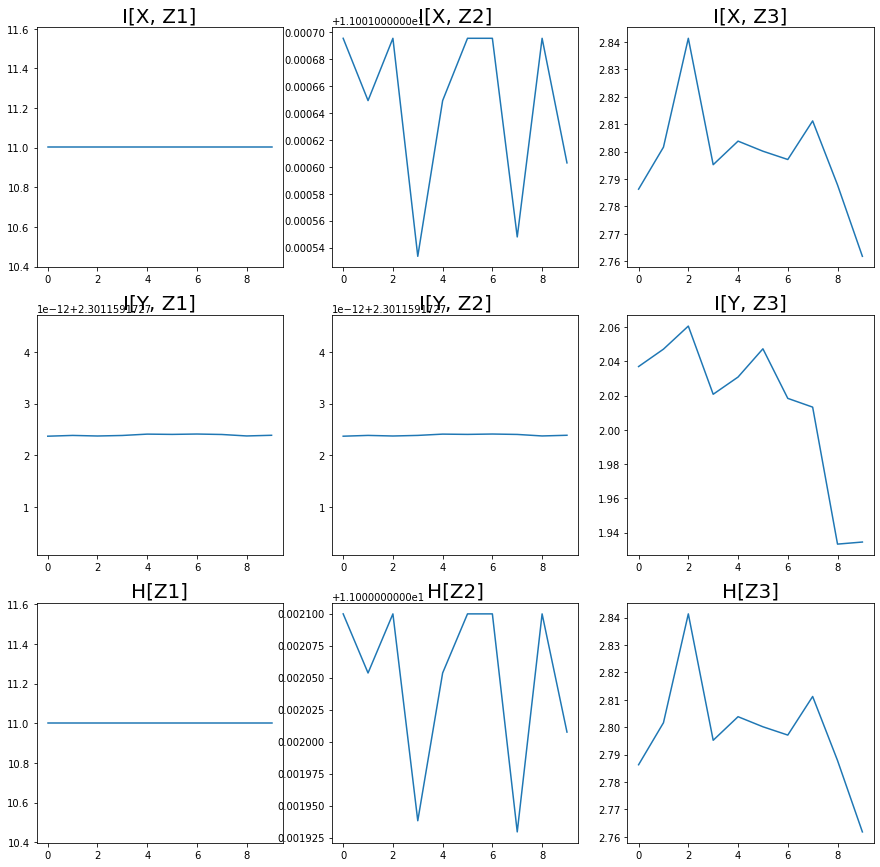

In [15]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharey=False)

axs[0][0].plot(mi_xz1)
axs[0][0].set_title('I[X, Z1]', fontsize=20)
axs[0][1].plot(mi_xz2)
axs[0][1].set_title('I[X, Z2]', fontsize=20)
axs[0][2].plot(mi_xz3)
axs[0][2].set_title('I[X, Z3]', fontsize=20)
axs[1][0].plot(mi_yz1)
axs[1][0].set_title('I[Y, Z1]', fontsize=20)
axs[1][1].plot(mi_yz2)
axs[1][1].set_title('I[Y, Z2]', fontsize=20)
axs[1][2].plot(mi_yz3)
axs[1][2].set_title('I[Y, Z3]', fontsize=20)
axs[2][0].plot(mi_z1)
axs[2][0].set_title('H[Z1]', fontsize=20)
axs[2][1].plot(mi_z2)
axs[2][1].set_title('H[Z2]', fontsize=20)
axs[2][2].plot(mi_z3)
axs[2][2].set_title('H[Z3]', fontsize=20)
